# Chapter 6 - The ARIMA Model

## Listing 6-1. Importing the data

In [54]:
import pandas as pd
import statsmodels.api as sm
data = sm.datasets.co2.load_pandas()
data = data.data
data.head()


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Listing 6-2. Importing the data

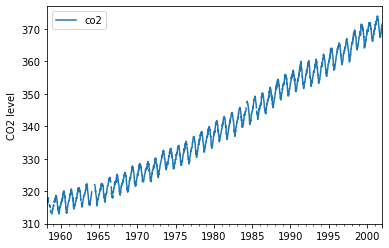

In [55]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel('CO2 level')
plt.show()

In [56]:
len(data)*0.3

685.1999999999999

## Listing 6-3. ACF and PACF plots

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


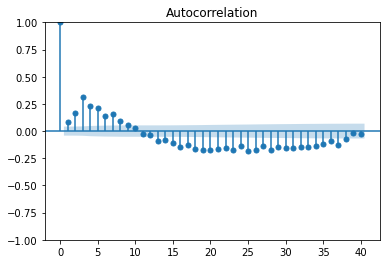

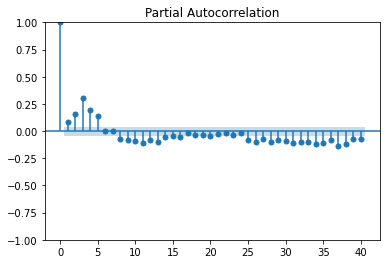

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.diff().dropna(), lags=40)
plot_pacf(data.diff().dropna(), lags=40)
plt.show();


## Listing 6-4. ACF and PACF plots with more lags

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


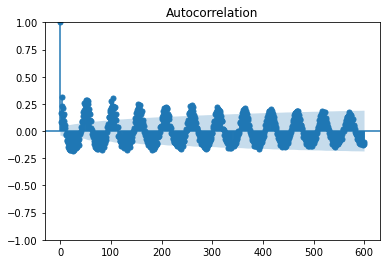

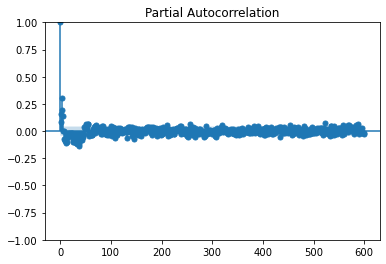

In [4]:
plot_acf(data.diff().dropna(), lags=600)
plot_pacf(data.diff().dropna(), lags=600)
plt.show()


## Listing 6-5. Hyperparameter tuning

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = data[['co2']].values

avg_errors = []

for p in range(6):
    for q in range(6):
        for i in range(3):
            errors = []

            tscv = TimeSeriesSplit(test_size=10)

            for train_index, test_index in tscv.split(data_array):

                X_train, X_test = data_array[train_index], data_array[test_index]
                X_test_orig = X_test

                fcst = []
                for step in range(10):

                    try:
                        mod = ARIMA(X_train, order=(p,i,q))
                        res = mod.fit()

                        fcst.append(res.forecast(steps=1))

                    except:
                        print('errorred')
                        fcst.append(-9999999.)

                    X_train = np.concatenate((X_train, X_test[0:1,:]))
                    X_test = X_test[1:]

                errors.append(r2_score(X_test_orig, fcst))

            pq_result = [p, i, q, np.mean(errors)]

            print(pq_result)
            avg_errors.append(pq_result)

avg_errors = pd.DataFrame(avg_errors)
avg_errors.columns = ['p', 'i', 'q', 'error']
avg_errors.sort_values('error', ascending=False)


In [8]:
! pip install pmdarima
from pmdarima.arima import auto_arima

In [36]:
val=int(len(data)*0.3)
arima_model=auto_arima(data['co2'].dropna(),start_p=1,start_q=1,max_q=10,max_p=10,out_of_sample_size=val)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2225
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1425.412
Date:                Fri, 03 Jun 2022   AIC                           2862.824
Time:                        14:47:49   BIC                           2897.067
Sample:                             0   HQIC                          2875.330
                               - 2225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0556      0.019     -2.864      0.004      -0.094      -0.018
ar.L2          0.0733      0.019      3.828      0.000       0.036       0.111
ar.L3          0.2709      0.018     15.148      0.000       0.236       0.306
ar.L4          0.1855      0.019      9.979      0.000       0.149       0.222
ar.L5          0.1521      0.020      7.435      0.000       0.112       0.192
sigma2         0.2109      0.005     39.904      0.000       0.201       0.221
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                79.36
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.08
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
arima_model

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Listing 6-6. Plot the final result

In [59]:
X_train, X_test = data.dropna()[:-10], data.dropna()[-10:]
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

X_test_orig = X_test

fcst = []

for step in range(10):

    mod = ARIMA(X_train, order=(4,1,4))
    res = mod.fit()
    fcst+=list(res.forecast(steps=1))
    X_train = X_train.append(X_test.iloc[step])


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hansh\a

In [58]:
X_train2, X_test2= data.dropna()[:-10], data.dropna()[-10:]

fcst2=[]


for step in range(10):

    mod2 = ARIMA(X_train2, order=(5,1,0))
    res2 = mod2.fit()
    fcst2+=list(res2.forecast(steps=1))
    X_train2 = X_train2.append(X_test2.iloc[step])


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

In [61]:
X_test_orig['Pred414']=fcst
X_test_orig['Pred510']=fcst2

<AxesSubplot:>

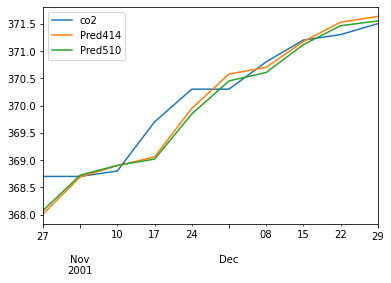

In [62]:
X_test_orig.plot()

In [63]:
r2_score(X_test_orig["co2"],fcst)

0.8919840272602612

In [64]:
r2_score(X_test_orig["co2"],fcst2)

0.8926503646001481

In [68]:
mod = ARIMA(X_test_orig["co2"], order=(5,1,0))
mod2=ARIMA(X_test_orig["co2"],order=(4,1,4))

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT w

In [69]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                   10
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  -0.725
Date:                Fri, 03 Jun 2022   AIC                             13.450
Time:                        14:57:56   BIC                             14.634
Sample:                    10-27-2001   HQIC                            10.897
                         - 12-29-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4917      0.930      0.529      0.597      -1.332       2.315
ar.L2         -0.4419      1.299     -0.340      0.734      -2.987       2.103
ar.L3          0.8254      0.832      0.992      0.321      -0.806       2.457
ar.L4         -0.0020      1.136     -0.002      0.999      -2.228       2.224
ar.L5          0.0366      1.016      0.036      0.971      -1.954       2.028
sigma2         0.0461      0.050      0.922      0.357      -0.052       0.144
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.69   Prob(JB):                         0.86
Heteroskedasticity (H):               0.57   Skew:                             0.36
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
mod2.fit().summary()

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                   10
Model:                 ARIMA(4, 1, 4)   Log Likelihood                  -0.448
Date:                Fri, 03 Jun 2022   AIC                             18.896
Time:                        14:58:02   BIC                             20.671
Sample:                    10-27-2001   HQIC                            15.066
                         - 12-29-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4762     15.021      0.032      0.975     -28.964      29.917
ar.L2         -0.3568      8.823     -0.040      0.968     -17.649      16.936
ar.L3          0.7735     10.493      0.074      0.941     -19.793      21.340
ar.L4         -0.2013     12.786     -0.016      0.987     -25.262      24.859
ma.L1          0.1392     32.652      0.004      0.997     -63.857      64.135
ma.L2         -0.0040     11.389     -0.000      1.000     -22.326      22.318
ma.L3          0.1081     35.499      0.003      0.998     -69.469      69.685
ma.L4          0.9654     97.977      0.010      0.992    -191.066     192.997
sigma2         0.0258      2.510      0.010      0.992      -4.894       4.946
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.55   Prob(JB):                         0.80
Heteroskedasticity (H):               0.48   Skew:                             0.54
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+17. Standard errors may be unstable.
"""